In [1]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

In [2]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D

model=Sequential()

model.add(Conv2D(256,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(64,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Using TensorFlow backend.
C:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passing (type, 1) or '1type' as

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [5]:
history=model.fit(train_data,train_target,epochs=100,validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 554 samples, validate on 139 samples
Epoch 1/100
554/554 [==============================] - 17s 31ms/step - loss: 0.7064 - acc: 0.5072 - val_loss: 0.6945 - val_acc: 0.5036
Epoch 2/100
554/554 [==============================] - 15s 26ms/step - loss: 0.6923 - acc: 0.5614 - val_loss: 0.6927 - val_acc: 0.5036
Epoch 3/100
554/554 [==============================] - 15s 27ms/step - loss: 0.6884 - acc: 0.5614 - val_loss: 0.6969 - val_acc: 0.5036
Epoch 4/100
554/554 [==============================] - 15s 27ms/step - loss: 0.6794 - acc: 0.5614 - val_loss: 0.6799 - val_acc: 0.5036
Epoch 5/100
554/554 [==============================] - 16s 29ms/step - loss: 0.6659 - acc: 0.6227 - val_loss: 0.6595 - val_acc: 0.6835
Epoch 6/100
554/554 [==============================] - 16s 28ms/step - loss: 0.6474 - acc: 0.5776 - val_loss: 0.6650 - val_acc: 0.5036
Epoch 7/100
554/554 [==============================] - 16s 29ms/step - loss: 0.6168 - acc: 0.561

554/554 [==============================] - 63s 113ms/step - loss: 0.0935 - acc: 0.9982 - val_loss: 0.7010 - val_acc: 0.7554
Epoch 60/100
554/554 [==============================] - 63s 114ms/step - loss: 0.0906 - acc: 1.0000 - val_loss: 0.7279 - val_acc: 0.7482
Epoch 61/100
554/554 [==============================] - 63s 113ms/step - loss: 0.0876 - acc: 1.0000 - val_loss: 0.6850 - val_acc: 0.7554
Epoch 62/100
554/554 [==============================] - 64s 116ms/step - loss: 0.0851 - acc: 1.0000 - val_loss: 0.7603 - val_acc: 0.7626
Epoch 63/100
554/554 [==============================] - 64s 115ms/step - loss: 0.0829 - acc: 1.0000 - val_loss: 0.7051 - val_acc: 0.7626
Epoch 64/100
554/554 [==============================] - 64s 115ms/step - loss: 0.0809 - acc: 1.0000 - val_loss: 0.8037 - val_acc: 0.7482
Epoch 65/100
554/554 [==============================] - 65s 117ms/step - loss: 0.0786 - acc: 1.0000 - val_loss: 0.6969 - val_acc: 0.7482
Epoch 66/100
554/554 [==============================] 

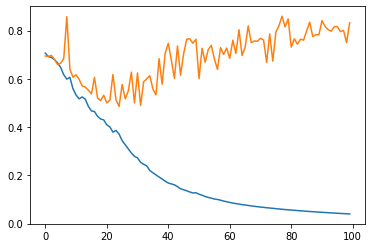

In [6]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

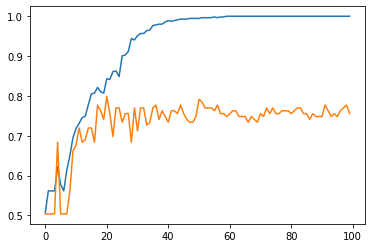

In [7]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

In [8]:
print(model.evaluate(test_data,test_target))

77/77 [==============================] - 1s 10ms/step
[0.5620687333020297, 0.857142859465116]


In [9]:
model.save_weights('CINNOMON STEM CNN.h5')